In [35]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [48]:
file = "output_data/Final_api_movie_2019.csv"
read_file = pd.read_csv(file)

df_file = pd.DataFrame(read_file)
df_file.head(3)


,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"


In [49]:
# dropping the rows that have no value for Omdb-Rated and Revenue
df_1 = df_file.dropna(subset = ["omdb_rated","Revenue"])
df_1.head()

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"
4,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
5,559969,El Camino: A Breaking Bad Movie,False,6000000,"['Crime', 'Drama', 'Thriller']",en,"['Sony Pictures Television', 'High Bridge Prod...",109.708,0,['United States of America'],...,11 Oct 2019,122 min,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.7,"81,896"


In [50]:
### MPAA rating (Omdb_rating) Vs. Revenue

In [51]:
# dropping the rows with 0 Revenue
index_1 = df_1[df_1['Revenue']==0].index
df_1.drop(index_1, inplace = True)
df_1[['omdb_rated','Revenue']].head()

,omdb_rated,Revenue
0,R,568509478
2,PG,1649676757
4,PG-13,1131450163
6,G,519802847
7,R,32000000


In [52]:
#Outlier for the revenue
df_1['Revenue'].max()

2797800564

In [85]:
df_1['omdb_rated'].value_counts()
list(df_1['omdb_rated'].unique())

['R',
 'PG',
 'PG-13',
 'G',
 'Not Rated',
 'TV-14',
 'TV-MA',
 'NC-17',
 'TV-Y7',
 'TV-Y',
 'Unrated',
 'TV-PG']

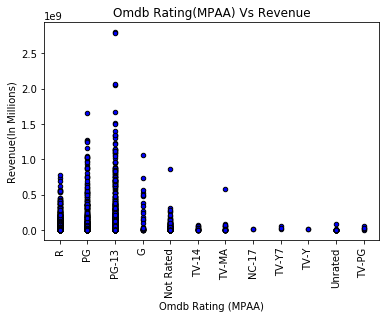

In [167]:
# MPAA rating (Omdb_Rating) Vs Revenue
plt.scatter(df_1["omdb_rated"],df_1["Revenue"], s= 20, edgecolors="black",facecolors="blue")
plt.title("Omdb Rating(MPAA) Vs Revenue")
plt.xlabel("Omdb Rating (MPAA)")
plt.ylabel("Revenue(In Millions)")
plt.xticks(rotation=90)
plt.savefig('Omdb Rating vs Revenue.png')
plt.show()

In [55]:
### MPAA rating(Omdb-Rating) vs Vote Average

In [133]:
# dropping the rows that have no value for Omdb-Rated and Revenue
df_2 = df_file.dropna(subset = ["omdb_rated","Vote Average"])
df_2

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"
4,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
5,559969,El Camino: A Breaking Bad Movie,False,6000000,"['Crime', 'Drama', 'Thriller']",en,"['Sony Pictures Television', 'High Bridge Prod...",109.708,0,['United States of America'],...,11 Oct 2019,122 min,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.7,"81,896"
6,301528,Toy Story 4,False,175000000,"['Adventure', 'Animation', 'Comedy', 'Family',...",en,"['Walt Disney Pictures', 'Pixar']",94.602,519802847,['United States of America'],...,21 Jun 2019,100 min,Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,8.1,"96,147"
7,338967,Zombieland: Double Tap,False,48000000,"['Horror', 'Action', 'Comedy']",en,"['Pariah', 'Columbia Pictures']",97.703,32000000,['United States of America'],...,18 Oct 2019,93 min,Ruben Fleischer,"Zoey Deutch, Emma Stone, Abigail Breslin, Bill...",English,USA,[],NaN,NaN,NaN
9,245891,John Wick,False,20000000,"['Action', 'Thriller']",en,"['Summit Entertainment', '87Eleven', 'DefyNite...",100.781,88761661,"['China', 'United States of America']",...,24 Oct 2014,101 min,"Chad Stahelski, David Leitch","Keanu Reeves, Michael Nyqvist, Alfie Allen, Wi...","English, Russian, Hungarian",USA,"[{'Source': 'Internet Movie Database', 'Value'...",68.0,7.4,"479,777"
10,384018,Fast & Furious Presents: Hobbs & Shaw,False,200000000,['Action'],en,['Universal Pictures'],100.230,591212350,['United States of America'],...,02 Aug 2019,137 min,David Leitch,"Dwayne Johnson, Jason Statham, Idris Elba, Van...","English, Samoan, Russian",USA,"[{'Source': 'Internet Movie Database', 'Value'...",60.0,6.7,"74,896"
11,453405,Gemini Man,False,138000000,"['Action', 'Thriller']",en,['Skydance Media'],97.670,59552372,"['China', 'United States of America']",...,11 Oct 2019,117 min,Ang Lee,"Will Smith, Mary Elizabeth Winstead, Clive Owe...",English,"China, USA","[{'Source': 'Internet Movie Database', 'Value'...",33.0,4.9,294


In [136]:
index_3 = df_2[df_2['Vote Average']==0].index
new = df_2.drop(index_3, inplace = True)
df_2

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
0,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"
1,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",NaN,NaN,NaN
2,420818,The Lion King,False,260000000,"['Adventure', 'Animation', 'Drama']",en,"['Walt Disney Pictures', 'Fairview Entertainme...",183.255,1649676757,['United States of America'],...,19 Jul 2019,118 min,Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.1,"102,621"
4,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
5,559969,El Camino: A Breaking Bad Movie,False,6000000,"['Crime', 'Drama', 'Thriller']",en,"['Sony Pictures Television', 'High Bridge Prod...",109.708,0,['United States of America'],...,11 Oct 2019,122 min,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.7,"81,896"
6,301528,Toy Story 4,False,175000000,"['Adventure', 'Animation', 'Comedy', 'Family',...",en,"['Walt Disney Pictures', 'Pixar']",94.602,519802847,['United States of America'],...,21 Jun 2019,100 min,Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,8.1,"96,147"
7,338967,Zombieland: Double Tap,False,48000000,"['Horror', 'Action', 'Comedy']",en,"['Pariah', 'Columbia Pictures']",97.703,32000000,['United States of America'],...,18 Oct 2019,93 min,Ruben Fleischer,"Zoey Deutch, Emma Stone, Abigail Breslin, Bill...",English,USA,[],NaN,NaN,NaN
9,245891,John Wick,False,20000000,"['Action', 'Thriller']",en,"['Summit Entertainment', '87Eleven', 'DefyNite...",100.781,88761661,"['China', 'United States of America']",...,24 Oct 2014,101 min,"Chad Stahelski, David Leitch","Keanu Reeves, Michael Nyqvist, Alfie Allen, Wi...","English, Russian, Hungarian",USA,"[{'Source': 'Internet Movie Database', 'Value'...",68.0,7.4,"479,777"
10,384018,Fast & Furious Presents: Hobbs & Shaw,False,200000000,['Action'],en,['Universal Pictures'],100.230,591212350,['United States of America'],...,02 Aug 2019,137 min,David Leitch,"Dwayne Johnson, Jason Statham, Idris Elba, Van...","English, Samoan, Russian",USA,"[{'Source': 'Internet Movie Database', 'Value'...",60.0,6.7,"74,896"
11,453405,Gemini Man,False,138000000,"['Action', 'Thriller']",en,['Skydance Media'],97.670,59552372,"['China', 'United States of America']",...,11 Oct 2019,117 min,Ang Lee,"Will Smith, Mary Elizabeth Winstead, Clive Owe...",English,"China, USA","[{'Source': 'Internet Movie Database', 'Value'...",33.0,4.9,294


In [137]:
new = df_2.groupby("omdb_rated")
new.first()

,ID,Title,Adult,Budget,Genres,Language,Production Company,Popularity,Revenue,Production Country,...,omdb_released,omdb_runtime,omdb_director,omdb_actors,omdb_language,omdb_country,omdb_ratings,omdb_metascore,omdb_imdbRating,omdb_imdbVotes
omdb_rated,,,,,,,,,,,,,,,,,,,,,
Approved,146712,A Fairly Odd Christmas,False,0,"['Family', 'Fantasy']",en,"['Pacific Bay Entertainment', 'Pacific Bay Ent...",3.800,0,['United States of America'],...,29 Nov 2012,68 min,Savage Steve Holland,"Drake Bell, Daniella Monet, David Lewis, Daran...","English, Spanish, Japanese",USA,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,4.7,664
G,301528,Toy Story 4,False,175000000,"['Adventure', 'Animation', 'Comedy', 'Family',...",en,"['Walt Disney Pictures', 'Pixar']",94.602,519802847,['United States of America'],...,21 Jun 2019,100 min,Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",English,USA,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,8.1,"96,147"
M,255413,anohana: The Flower We Saw That Day - The Movie,False,0,"['Animation', 'Drama']",ja,['A-1 Pictures'],6.568,0,['Japan'],...,31 Aug 2013,99 min,Tatsuyuki Nagai,"Saori Hayami, Yumi Irino, Ai Kayano, Takahiro ...",Japanese,Japan,"[{'Source': 'Internet Movie Database', 'Value'...",74.0,7.4,"1,380"
NC-17,73861,A Serbian Film,False,0,"['Crime', 'Horror', 'Thriller']",sr,['Contra Film'],17.762,0,['Serbia'],...,21 Jan 2012,104 min,Srdjan Spasojevic,"Srdjan 'Zika' Todorovic, Sergej Trifunovic, Je...","Serbian, English, Swedish",Serbia,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,5.1,"52,147"
NOT RATED,44125,From Beginning to End,False,0,"['Romance', 'Drama']",pt,['Lama Filmes'],6.536,0,['Brazil'],...,27 Nov 2009,94 min,Aluizio Abranches,"Júlia Lemmertz, Fábio Assunção, Jean Pierre No...","Portuguese, Spanish, English",Brazil,"[{'Source': 'Internet Movie Database', 'Value'...",52.0,6.6,"6,574"
Not Rated,120457,Drifters,False,0,['Comedy'],it,"['Rai Cinema', 'Fandango']",28.438,0,['Italy'],...,02 Mar 2012,111 min,Matteo Rovere,"Andrea Bosca, Miriam Giovanelli, Claudio Santa...",Italian,Italy,"[{'Source': 'Internet Movie Database', 'Value'...",34.0,5.6,603
PG,420809,Maleficent: Mistress of Evil,False,0,"['Fantasy', 'Adventure', 'Family']",en,['Walt Disney Pictures'],287.919,0,['United States of America'],...,18 Oct 2019,118 min,Joachim Rønning,"Angelina Jolie, Elle Fanning, Imelda Staunton,...",English,USA,"[{'Source': 'Rotten Tomatoes', 'Value': '51%'}]",55.0,7.1,"102,621"
PG-13,429617,Spider-Man: Far from Home,False,160000000,"['Action', 'Adventure', 'Science Fiction']",en,"['Marvel Studios', 'Sony Pictures', 'Columbia ...",123.576,1131450163,['United States of America'],...,02 Jul 2019,129 min,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...","Italian, Czech, English",USA,"[{'Source': 'Internet Movie Database', 'Value'...",69.0,7.7,"187,214"
R,475557,Joker,False,55000000,"['Crime', 'Thriller', 'Drama']",en,"['DC Entertainment', 'Warner Bros. Pictures', ...",462.910,568509478,['United States of America'],...,04 Oct 2019,122 min,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",English,"USA, Canada","[{'Source': 'Internet Movie Database', 'Value'...",59.0,8.9,"360,218"


In [150]:
df_2["omdb_rated"].value_counts()

R            2574
Not Rated    1675
PG-13        1216
PG            520
TV-MA         418
TV-14         300
Unrated       203
TV-G          197
TV-PG         166
G             130
NOT RATED      30
TV-Y7          23
TV-Y           19
NC-17           4
TV-Y7-FV        3
M               2
Approved        1
TV-13           1
UNRATED         1
Name: omdb_rated, dtype: int64

In [ ]:
#df_2[["omdb_rated","Vote Average"]].head

In [139]:
#new_1.set_index("omdb_rated").head()

In [152]:
new.get_group('G').mean()

ID                 2.002489e+05
Adult              0.000000e+00
Budget             1.290538e+07
Popularity         9.017015e+00
Revenue            4.564186e+07
Run Time           6.544186e+01
Vote Average       6.497692e+00
Vote Count         5.099615e+02
omdb_year                   inf
omdb_metascore     6.491667e+01
omdb_imdbRating    6.386923e+00
dtype: float64

In [153]:
new.get_group('R').mean()

ID                 2.283455e+05
Adult              0.000000e+00
Budget             9.362637e+06
Popularity         9.932117e+00
Revenue            2.228809e+07
Run Time           1.017267e+02
Vote Average       5.965152e+00
Vote Count         7.053722e+02
omdb_year                   inf
omdb_metascore     5.492096e+01
omdb_imdbRating    5.953445e+00
dtype: float64

In [154]:
new.get_group('PG').mean()

ID                 2.253893e+05
Adult              0.000000e+00
Budget             3.751187e+07
Popularity         1.237024e+01
Revenue            1.206446e+08
Run Time           9.690097e+01
Vote Average       6.412115e+00
Vote Count         1.155615e+03
omdb_year                   inf
omdb_metascore     5.522727e+01
omdb_imdbRating    6.219653e+00
dtype: float64

In [155]:
new.get_group('PG-13').mean()

ID                 2.110559e+05
Adult              0.000000e+00
Budget             3.647461e+07
Popularity         1.250810e+01
Revenue            1.178259e+08
Run Time           1.063624e+02
Vote Average       6.334539e+00
Vote Count         1.767660e+03
omdb_year                   inf
omdb_metascore     5.233560e+01
omdb_imdbRating    6.272510e+00
dtype: float64

In [156]:
new.get_group('Not Rated').mean()

ID                 2.596989e+05
Adult              0.000000e+00
Budget             2.215341e+06
Popularity         6.387909e+00
Revenue            4.709800e+06
Run Time           1.014299e+02
Vote Average       6.150448e+00
Vote Count         1.255504e+02
omdb_metascore     5.897106e+01
omdb_imdbRating    6.082507e+00
dtype: float64

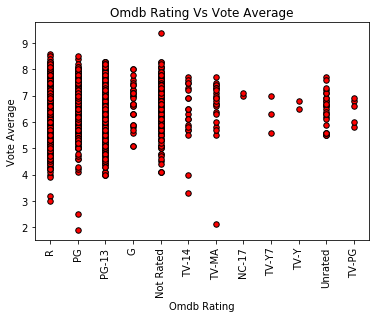

In [166]:
plt.scatter(df_1["omdb_rated"],df_1["Vote Average"],s = 30, edgecolors="black",facecolors="red")
plt.title("Omdb Rating Vs Vote Average")
plt.xlabel("Omdb Rating")
plt.ylabel("Vote Average")
plt.xticks(rotation=90)
plt.savefig('Omdb Rating vs Vote Average.png')
plt.show()